# Visualization

For the visualization questions, the original file was uploaded to Gemini and asked for questions.

---

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [14]:
df = pd.read_csv('../data/processed/chocolate_sales.csv', parse_dates=['Date'])
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184


In [ ]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   3282 non-null   str           
 1   Country        3282 non-null   str           
 2   Product        3282 non-null   str           
 3   Date           3282 non-null   datetime64[us]
 4   Amount         3282 non-null   float64       
 5   Boxes Shipped  3282 non-null   int64         
dtypes: datetime64[us](1), float64(1), int64(1), str(3)
memory usage: 154.0 KB


## Sales Performance
1. What is the total profit accumulated during the period?
2. What is the average value per sale?
3. What is the total volume of boxes shipped?
4. Is there a correlation between the sales value (Value) and the quantity of boxes shipped?

### 1. What is the total profit accumulated during the period?

In [22]:
df['Month_Year'] = df['Date'].dt.to_period('M')
total_profit_by_month = df.groupby('Month_Year')['Amount'].sum().reset_index()
total_profit_by_month

,Month_Year,Amount
0,2022-01,896105.00
1,2022-02,699377.00
2,2022-03,749483.00
3,2022-04,674051.00
4,2022-05,752892.00
5,2022-06,865144.00
6,2022-07,803425.00
7,2022-08,743148.00
8,2023-01,958985.77
9,2023-02,749617.46


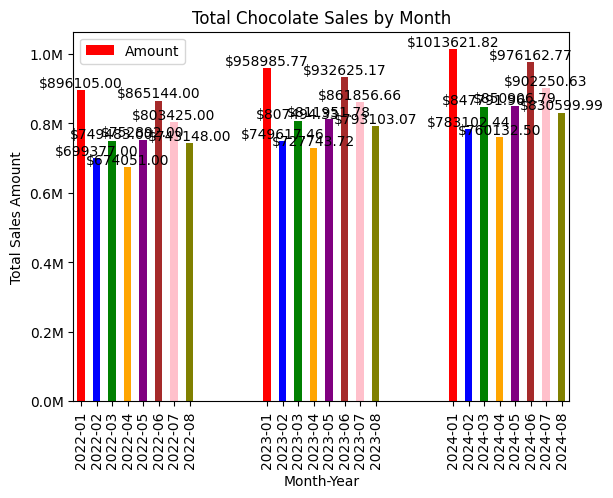

In [ ]:
ax = total_profit_by_month.plot(
    x='Month_Year', 
    y='Amount', 
    kind='bar',
    color=['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'olive'], 
    title='Total Chocolate Sales by Month', 
    ylabel='Total Sales Amount', 
    xlabel='Month-Year'
)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

for container in ax.containers:
    ax.bar_label(container, fmt='$%.2f')


In [23]:
df['Year'] = df['Date'].dt.to_period('Y')
total_profit_by_year = df.groupby('Year')['Amount'].sum().reset_index()
total_profit_by_year

,Year,Amount
0,2022,6183625.00
1,2023,6643377.96
2,2024,6964568.90


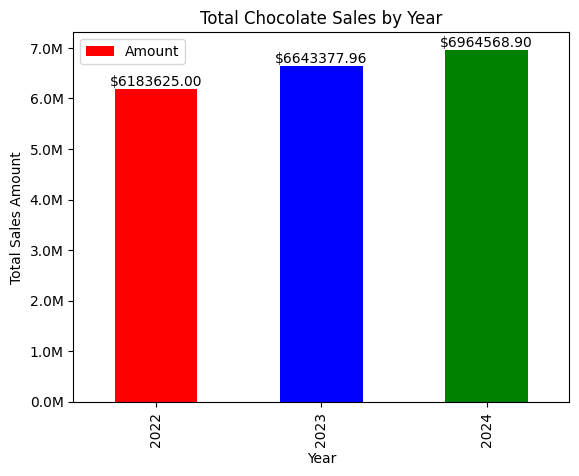

In [42]:
ax = total_profit_by_year.plot(
    x='Year', 
    y='Amount', 
    kind='bar',
    color=['red', 'blue', 'green'],
    title='Total Chocolate Sales by Year', 
    ylabel='Total Sales Amount', 
    xlabel='Year'
)

# Format y-axis labels to show amounts in millions
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

#add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='$%.2f')
